The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Let's preview and look the general information in our dataset to better understand how we can explore it!

In [2]:
# Read in the data
nobel = pd.read_csv("data/nobel.csv")

# Preview the data
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

## What is the most commonly awarded gender and birth country? 🤔 Store the string answers as top_gender and top_country.
Let's see the value occurrences of the `sex` and `birth country` columns in our *noble* dataset first.

In [4]:
# Frequency of sex column
nobel['sex'].value_counts()

Male      905
Female     65
Name: sex, dtype: int64

In [5]:
# Frequency of birth_country column
nobel['birth_country'].value_counts()

United States of America                        291
United Kingdom                                   91
Germany                                          67
France                                           58
Sweden                                           30
                                               ... 
Austria-Hungary (Ukraine)                         1
Ottoman Empire (Turkey)                           1
Russian Empire (Azerbaijan)                       1
Bosnia (Bosnia and Herzegovina)                   1
French protectorate of Tunisia (now Tunisia)      1
Name: birth_country, Length: 129, dtype: int64

The results above shows that **males are the most commonly awarded gender**, and **the United States is the most commonly awarded birth country**. That's not surprising, let's store the values into variables as instructed.

In [6]:
#Store the value with the most occurrences
top_gender = nobel['sex'].value_counts().index[0]
top_country = nobel['birth_country'].value_counts().index[0]
print("The most commonly awarded gender is", top_gender)
print("The most commonly awarded birth country is", top_country)

The most commonly awarded gender is Male
The most commonly awarded birth country is United States of America


## What decade had the highest proportion of US-born laureates? 🌎 Store this as an integer called max_decade_usa.

To answer this question, we need to determine the decade when the nobel prize laureates were rewarded, we can obtain this information from the `year` column. Afterward, we can examine the occurrences of each decade to determine which decade had the most US-born laureates.

In [7]:
# Define function to extract decade from the year
def extract_decade(year):
    return np.floor(year / 10) * 10

# Apply the function to the 'year' column
nobel['decade'] = nobel['year'].apply(lambda x: extract_decade(x))
nobel['decade'] = nobel['decade'].astype(int)
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1900
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1900
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1900
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,1900
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,1900


In [8]:
# Make a new column to filter Nobel Prize laureates born in the USA
nobel['usa_born'] = nobel['birth_country'] == 'United States of America'
# Group by decade and calculate the mean proportion of USA-born laureates
prop_usa_npl = nobel.groupby('decade')['usa_born'].agg('mean')
# Reset the index to make 'decade' a regular column
prop_usa_npl = prop_usa_npl.reset_index()
# Sort based on the proportion column that's already aggregated
prop_usa_npl.sort_values(by=['usa_born'], ascending=False)

,decade,usa_born
10,2000,0.422764
9,1990,0.403846
12,2020,0.360000
8,1980,0.319588
7,1970,0.317308
11,2010,0.314050
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
3,1930,0.250000


Wow, so most US-born Nobel Prize laureates were awarded in 2000s with the proportion of 0.423. Let's store this information in an integer called *'max_decade_usa'* as instructed 

In [9]:
max_decade_usa = prop_usa_npl[prop_usa_npl['usa_born'] == prop_usa_npl['usa_born'].max()]['decade'].values[0]

print("The decade with the highest proportion of US-born laureates is", max_decade_usa)

The decade with the highest proportion of US-born laureates is 2000


Let's play with visualization ^-^ 

We can plot the relationship in our data by grouping it using relplot. The line option in relplot is particularly useful for capturing the trendline of US-born laureates as the decades progress~ 📈

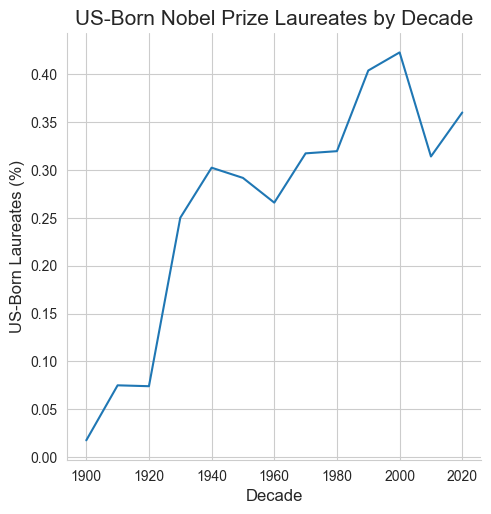

In [10]:
sns.set_style("whitegrid")
sns.relplot(x='decade', y='usa_born', data=prop_usa_npl, kind="line")

plt.xlabel("Decade", fontsize=12)
plt.ylabel("US-Born Laureates (%)", fontsize=12)
plt.title("US-Born Nobel Prize Laureates by Decade", fontsize=15)
plt.show()

## What decade and category pair had the highest proportion of female laureates? 🏅 Store this as a dictionary called max_female_dict where the decade is the key and the category is the value.

To answer this question, we need to calculate the proportion of female laureates according to the decade and the category/field they were awarded. From the grouped data we can determine which decade and category pair with the highest proportion.

In [11]:
# Calculating the proportion of female laureates based on decade and category
nobel['female_laureate'] = nobel['sex'] == 'Female'
prop_female_npl = nobel.groupby(['decade', 'category'])['female_laureate'].mean()
prop_female_npl = prop_female_npl.reset_index()
prop_female_npl.sort_values(by=['female_laureate'], ascending=False)

,decade,category,female_laureate
68,2020,Literature,0.500000
64,2010,Peace,0.357143
50,1990,Literature,0.300000
56,2000,Literature,0.300000
66,2020,Chemistry,0.300000
...,...,...,...
34,1960,Peace,0.000000
37,1970,Economics,0.000000
38,1970,Literature,0.000000
41,1970,Physics,0.000000


So most female laureates were awarded in 2020 and belong to literature category! That's interesting, let's store it in a variable named max_female_pair as instructed.

In [12]:
# Store the pair with maximum female proportion
max_female_pair = prop_female_npl[prop_female_npl["female_laureate"] == prop_female_npl["female_laureate"].max()]

# Store result as a dictionary
max_female_dict = {max_female_pair['decade'].values[0]: max_female_pair['category'].values[0]}
print(max_female_pair)

    decade    category  female_laureate
68    2020  Literature              0.5


Let's continue exploring with visualization ^-^

Since we're still interested in observing trends by decade, we can utilize relplot again just like what we did in the previous plot!

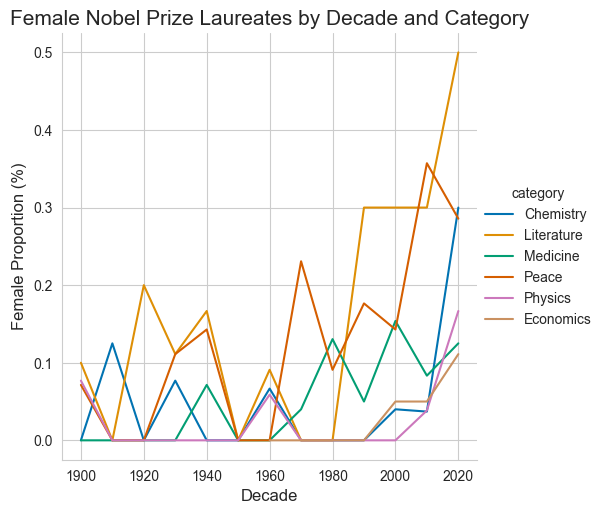

In [13]:
sns.relplot(x='decade', y='female_laureate', hue='category', data=prop_female_npl, kind="line", palette="colorblind")

plt.xlabel("Decade", fontsize=12)
plt.ylabel("Female Proportion (%)", fontsize=12)
plt.title("Female Nobel Prize Laureates by Decade and Category", fontsize=15)
plt.show()

## Who was the first woman to receive a Nobel Prize, and in what category? Save your string answers as first_woman_name and first_woman_category.

To answer this question, we can subset the rows to select only female laureates then sort them by year. Then store the first name and category that appears. 

In [14]:
# Select the female laureates and sort them by the year
nobel[nobel['female_laureate']].sort_values(by="year")

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,usa_born,female_laureate
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,1900,False,True
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Female,NaN,NaN,NaN,1914-06-21,Vienna,Austria,1900,False,True
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,579,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Female,NaN,NaN,NaN,1940-03-16,Mårbacka,Sweden,1900,False,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,1910,False,True
128,1926,Literature,The Nobel Prize in Literature 1926,"""for her idealistically inspired writings whic...",1/1,597,Individual,Grazia Deledda,1871-09-27,"Nuoro, Sardinia",Italy,Female,NaN,NaN,NaN,1936-08-15,Rome,Italy,1920,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,2022,Literature,The Nobel Prize in Literature 2022,"""for the courage and clinical acuity with whic...",1/1,1017,Individual,Annie Ernaux,1940-09-01,Lillebonne,France,Female,NaN,NaN,NaN,NaN,NaN,NaN,2020,False,True
993,2023,Physics,The Nobel Prize in Physics 2023,"""for experimental methods that generate attose...",1/3,1028,Individual,Anne L’Huillier,1958-08-16,Paris,France,Female,Lund University,Lund,Sweden,NaN,NaN,NaN,2020,False,True
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaN,NaN,NaN,2020,False,True
989,2023,Medicine,The Nobel Prize in Physiology or Medicine 2023,"""for their discoveries concerning nucleoside b...",1/2,1024,Individual,Katalin Karikó,1955-01-17,Szolnok,Hungary,Female,Szeged University,Szeged,Hungary,NaN,NaN,NaN,2020,False,True


As we all know, Marie Curie is famous for being the first woman to win a Nobel Prize in 1903 for her groundbreaking contributions to Physics. Setting our earlier question aside, by examining the dataframe above, we can observe that she was also awarded the Nobel Prize again in 1911 in the field of Chemistry (4th row) ^-^ Let's store her name and category as instructed.

In [15]:
# Store the first female Nobel Prize laureate's name and category
first_woman_npl_name = nobel[nobel['female_laureate']].sort_values(by="year")["full_name"].values[0]
first_woman_npl_category = nobel[nobel['female_laureate']].sort_values(by="year")["category"].values[0]
print(f"The first woman Nobel laureate was {first_woman_npl_name} with extraordinary contribution to the field of {first_woman_npl_category}")

The first woman Nobel laureate was Marie Curie, née Sklodowska with extraordinary contribution to the field of Physics


## Which individuals or organizations have won multiple Nobel Prizes throughout the years? Store the full names in a list named repeat_list.

To answer this question, we can calculate the frequency of each unique value within `full_name` column, then we can use it to filter names that occur more than once.

In [16]:
name_counts = nobel["full_name"].value_counts()
repeat_name = name_counts[name_counts >= 2] 
repeat_name

Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Name: full_name, dtype: int64

Okay, that's impressive ^-^ There are 6 individuals/organizations who have won multiple Nobel Prizes! Marie Curie, whom we discussed earlier, is among them.

In [17]:
# Store the name from repeat variable in a list
repeat_name_list = list(repeat_name.index)
print("The repeat Nobel Prize laureates are: ", repeat_name_list)

The repeat Nobel Prize laureates are:  ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
